In [1]:
import numpy as np
import pandas as pd

Import plotting routines

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

Open the ILO and FINDEX data bases

In [3]:
ILO_data = pd.read_csv('ILO/ILO.csv', index_col=0, encoding='utf-8')

In [4]:
ILO_data.head(2)

,Total public social protection expenditure and health expenditure,Public health care,Public social protection,year,sanity
country,,,,,
Algeria,8.53,3.17,5.36,2011,0
Angola,6.79,2.15,4.64,2011,0


In [5]:
FINDEX_savings_data_p40 = pd.read_csv('wb_data_raw/FINDEX_saved_p40.csv', index_col=0,  encoding='utf-8')
FINDEX_savings_data_r60 = pd.read_csv('wb_data_raw/FINDEX_saved_r60.csv', index_col=0,  encoding='utf-8')

In [6]:
FINDEX_savings_data_r60.head(2)

,"Saved at a financial institution, 60% richest [WP_time_04.9]",year
country,,
Afghanistan,0.044609,2014
Albania,0.096454,2014


## Correct flaws in the ILO data

In [7]:
ILO_data.rename(index = lambda x: x.strip(), inplace=True) # Deletes white spaces at the end of the index entries in the ILO index

## Rename to World Bank spelling

In [8]:
any_name_to_wb_name = pd.read_csv("../git/country_names/out/any_name_to_wb_name.csv",index_col="any",squeeze=True, encoding="utf-8")

In [9]:
ILO_data = ILO_data.rename(index=any_name_to_wb_name) # This is a sweet one-line command to rename the index using a dictionary-like translation, which in this case is any_name_to_wb_name
FINDEX_savings_data_p40 = FINDEX_savings_data_p40.rename(index=any_name_to_wb_name)
FINDEX_savings_data_r60 = FINDEX_savings_data_r60.rename(index=any_name_to_wb_name)

## Plot the data

### Plot1 shows public social protection and savings of the poor

In [10]:
ilo_plot1 = ILO_data['Public social protection']
findex_plot1 = FINDEX_savings_data_p40['Saved at a financial institution, 40% poorest [WP_time_04.8]']

In [11]:
ilo_plot1 = pd.to_numeric(ilo_plot1, errors='coerce')

In [12]:
plot1 = pd.concat([ilo_plot1, findex_plot1], axis=1)

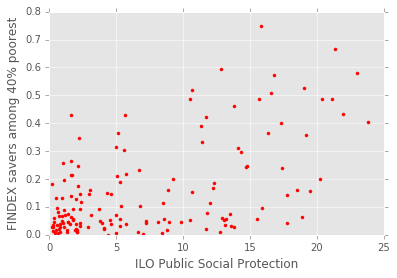

In [13]:
fig1 = plt.figure()
fig1 = plt.plot(plot1.values[:,0], plot1.values[:,1], ls='', marker='.', color='r')
plt.xlabel('ILO Public Social Protection')
plt.ylabel('FINDEX savers among 40% poorest')

### Plot 2 shows public social protection and savings of the rich

In [14]:
findex_plot2 = FINDEX_savings_data_r60['Saved at a financial institution, 60% richest [WP_time_04.9]']

In [15]:
plot2 = pd.concat([ilo_plot1, findex_plot2], axis=1)

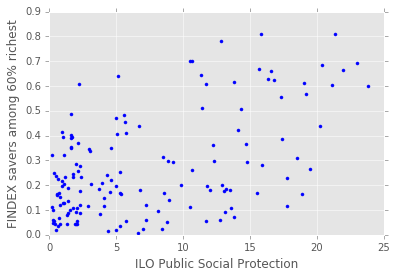

In [16]:
fig2 = plt.figure()
fig2 = plt.plot(plot2.values[:,0], plot2.values[:,1], ls='', marker='.', color='b')
plt.xlabel('ILO Public Social Protection')
plt.ylabel('FINDEX savers among 60% richest')

### Plot ILO Public Social Protection and Health against savings of poor and rich

In [17]:
ilo_plot3 = ILO_data['Total public social protection expenditure and health expenditure']

In [18]:
ilo_plot3 = pd.to_numeric(ilo_plot3, errors='coerce')

In [19]:
plot3 = pd.concat([ilo_plot3, findex_plot1], axis=1)

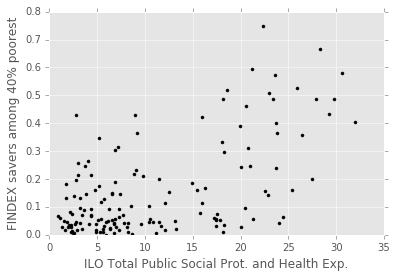

In [20]:
fig3 = plt.figure()
fig3 = plt.plot(plot3.values[:,0], plot3.values[:,1], ls='', marker='.', color='k')
plt.xlabel('ILO Total Public Social Prot. and Health Exp.')
plt.ylabel('FINDEX savers among 40% poorest')

In [21]:
plot3 = pd.concat([ilo_plot3, findex_plot2], axis=1)

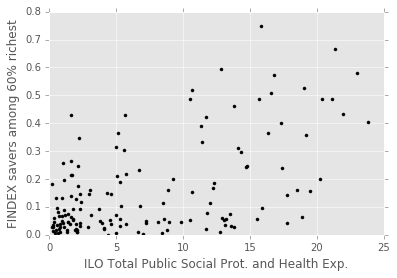

In [22]:
fig3 = plt.figure()
fig3 = plt.plot(plot1.values[:,0], plot1.values[:,1], ls='', marker='.', color='k')
plt.xlabel('ILO Total Public Social Prot. and Health Exp.')
plt.ylabel('FINDEX savers among 60% richest')